1.Create database – restaurant, create collection – rescollection. Insert the documents into collections.

In [3]:
from pymongo import MongoClient
import json
if __name__ == "__main__":
    client = MongoClient("mongodb://localhost:27017")
    print(client)
    #first create a database
    db = client['restaurant']
    #collection
    collection = db['rescollection']
    #loading or opening json file
    with open ('D:/PyMongo_Spyder/restaurants-dataset.json', "r", encoding="utf-8") as file:
        record = file.read()
        record = record.replace('\n', '')
        record = record.replace('}{', '},{')
        record = "[" + record + "]"
        file_data = json.loads(record)
        
    if isinstance(file_data, list):
        collection.insert_many(file_data)
    else:
        collection.insert_one(file_data)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


2.Display all the documents in the collection restaurants.

db.rescollection.find().pretty()

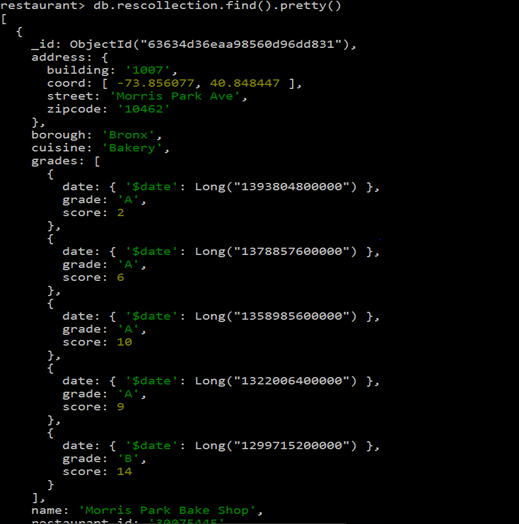

3.Display the fields restaurant_id, name, borough, and zip code, but exclude the field _id for all the documents in the collection restaurant.


In [ ]:
db.rescollection.find({},{restaurant_id : 1,name : 1, borough : 1,'address.zipcode' : 1,_id : 0})

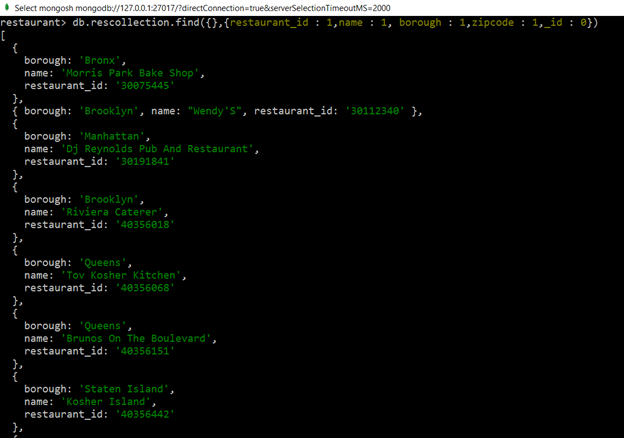

4.Find the restaurants who achieved a score more than 90.

In [ ]:

db.rescollection.find({'grades.score' : {$gt : 90}},{name : 1,_id:0})


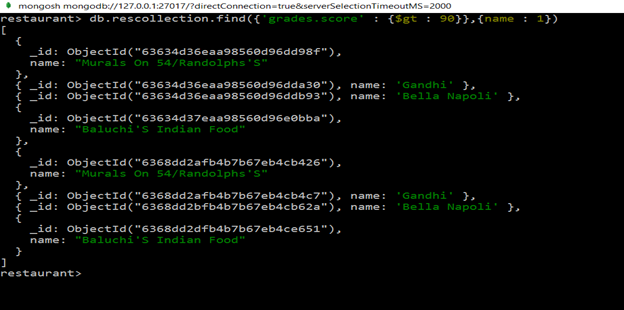

5.Show the restaurants that achieved a score, more than 80 but less than 100.

In [ ]:
db.rescollection.find({'grades.score' : {$gt : 80,$lt : 100}},{name : 1}

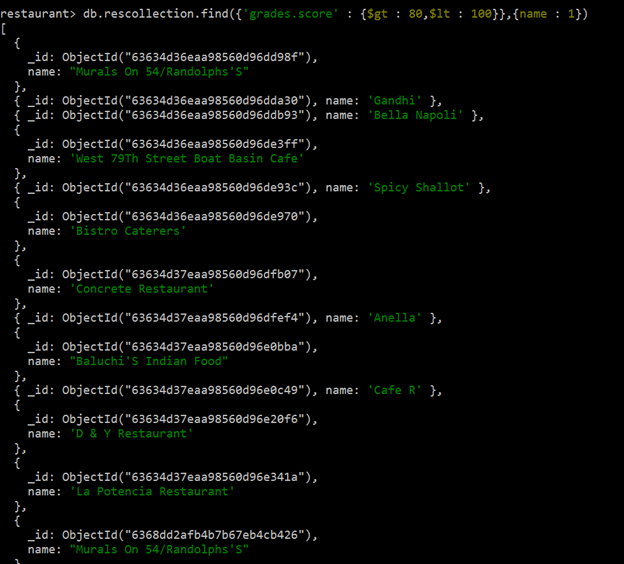

6.Write Query to show the restaurants that do not prepare any cuisine of american & their grade score > 70.

In [ ]:
db.rescollection.find({$and:[{"cuisine" : {$ne :"American "}},{"grades.score" : {$gt : 70}}]})

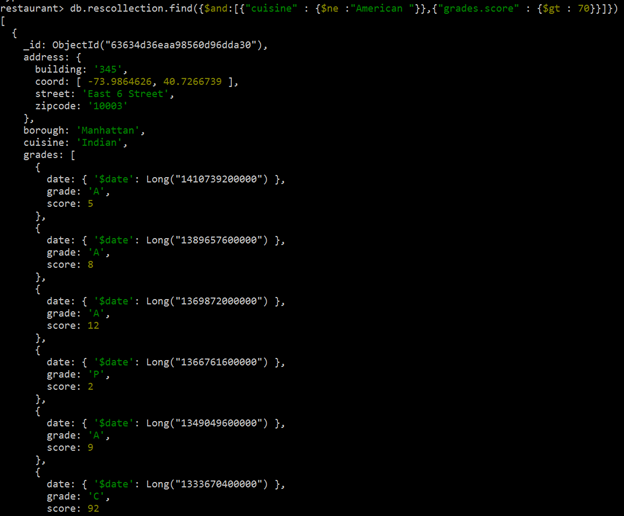

In [ ]:
7.Write a MongoDB query to arrange the name of the cuisine in an ascending order and for that same borough arranged in descending order.

In [ ]:
db.rescollection.find().sort({cuisine:1,borough:-1})

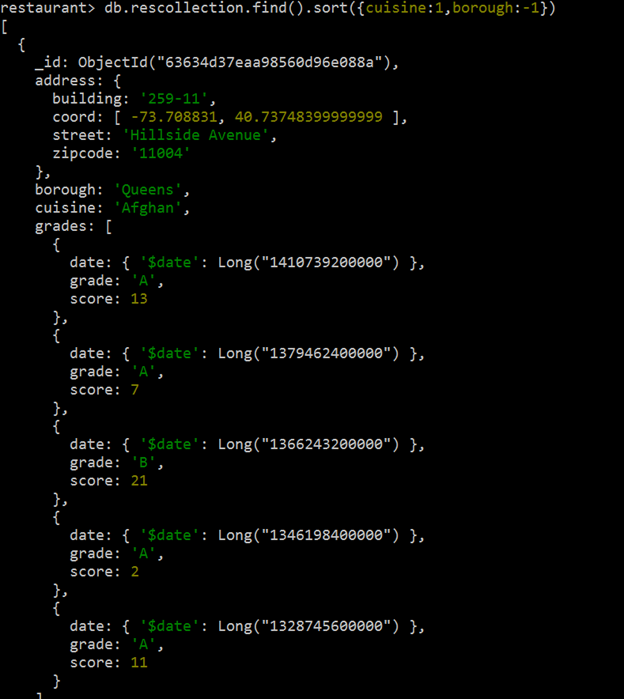

In [ ]:
8.Write a MongoDB query to arrange the name of the cuisine in descending order.

In [ ]:
db.rescollection.find().sort({cuisine:-1})

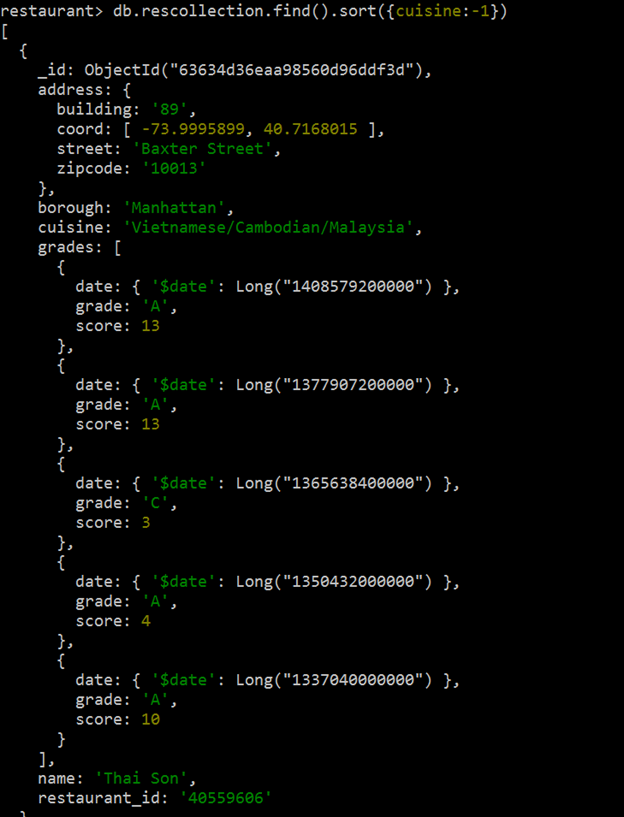

In [ ]:
9.Show the restaurant Id, name, borough and cuisines for those restaurants which prepared dish except 'American' and 'Chinese' or restaurant's name begins with letter 'Bil'.

In [ ]:
db.rescollection.find({$or:[{name: /^Bil/},{$and: [{cuisine: {$ne :"American "}},{cuisine : {$ne :"Chinese"}}]}]},{restaurant_id : 1,name:1,borough:1,cuisine:1})

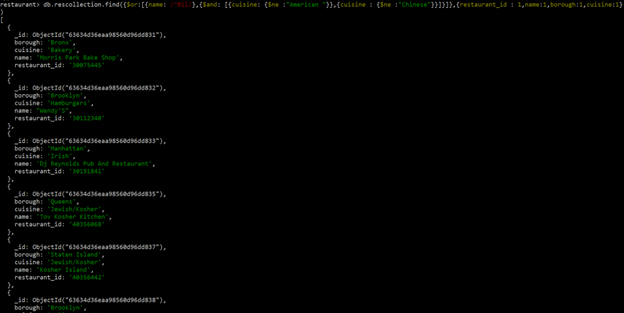

In [ ]:
10.Show the restaurant Id, name, borough and cuisines and score for restaurant's name begins with letter 'Bil'.

In [ ]:
db.rescollection.find({"name" : { $regex : /^Bil.*/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})

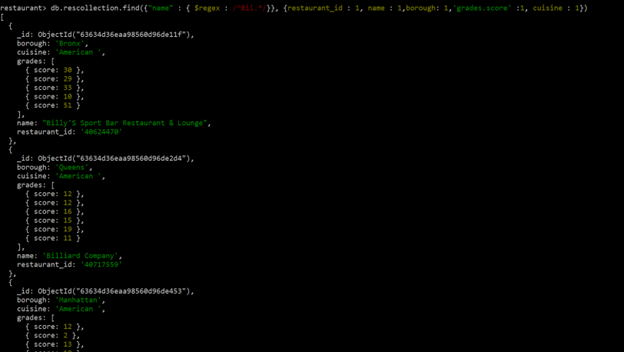

In [ ]:
11.Show the restaurant Id, name, borough and cuisines and score for restaurant serving “Indian” as cuisines.

In [ ]:

db.rescollection.find({cuisine:'Indian'},{restaurant_id:1,name:1,borough:1,cuisine:1,_id:0,'grades.score':1})


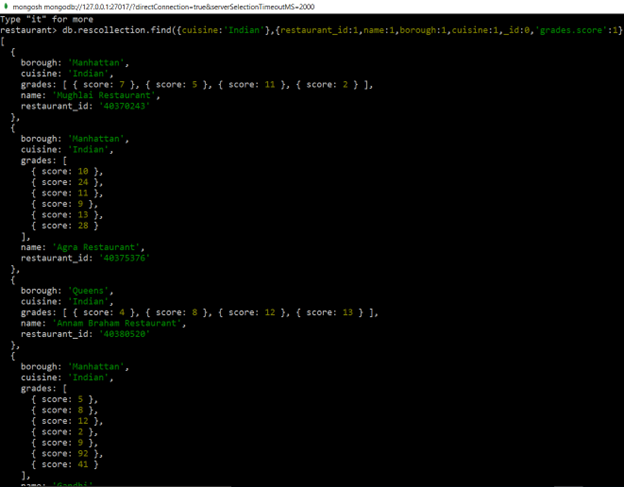

In [ ]:
12.Write a MongoDB query to find the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'bi' as last three letters for its name.

In [ ]:
db.rescollection.find({"name" : { $regex : /.*bi$/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})

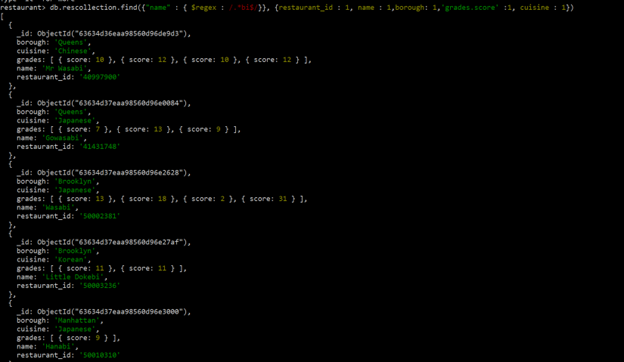

In [ ]:
13.Write a MongoDB query to find the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'il' as last three letters for its name.

In [ ]:
db.rescollection.find({"name" : { $regex : /.*il$/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})

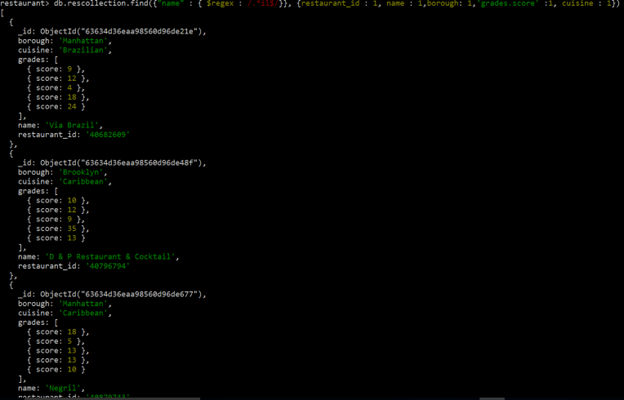

In [ ]:
14.Write a query to show all the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'il' anywhere in its name.

In [ ]:
db.rescollection.find({"name" : { $regex : /.*il.*/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})

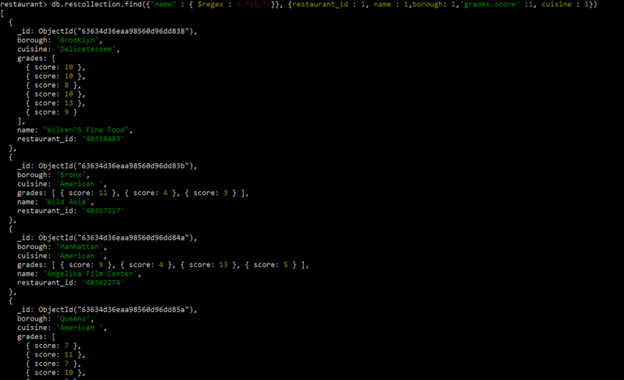

In [ ]:
15.Write a MongoDB query which will select the restaurant Id, name and grades for those restaurants which returns 0 as a remainder after dividing the score by 7

In [ ]:
db.rescollection.find({"grades.score":{$mod : [7,0]}},{restaurant_id: 1,name:1,grades:1,_id:0})

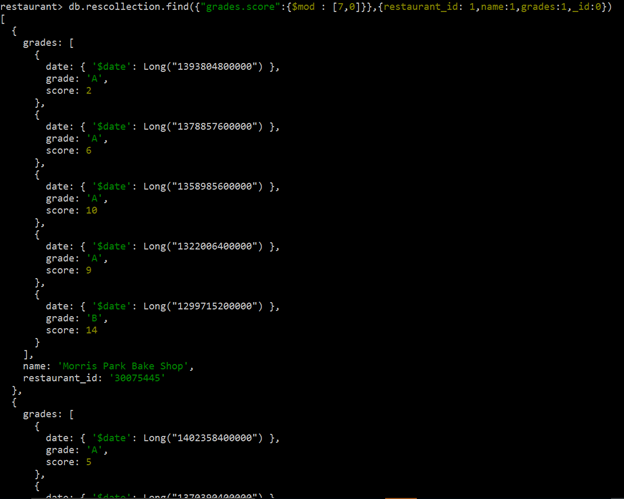

In [ ]:
16.Show document/record counts that has street and not street in addresses. 

In [ ]:
db.rescollection.find({"address.street":{ $exists : true }})

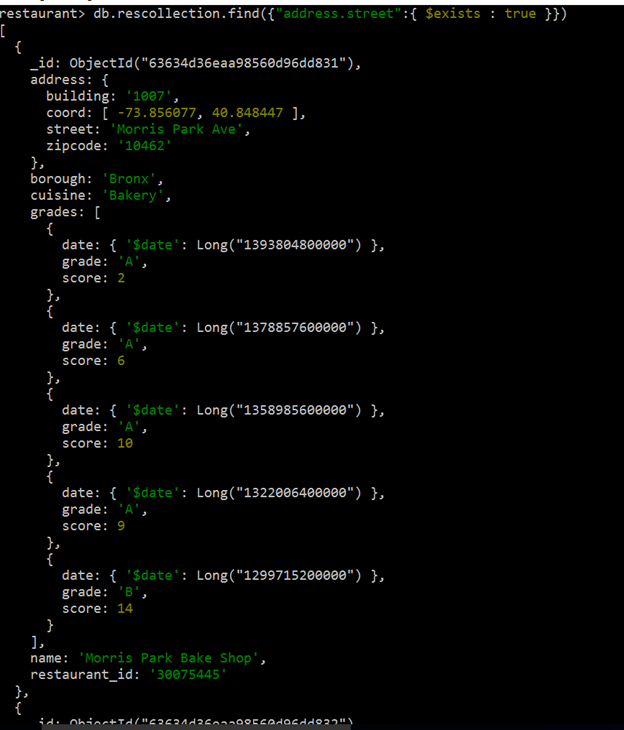

In [ ]:
17.Write a MongoDB query to find the restaurants which do not prepare any cuisine of 'American' and achieved a score more than 70 and located in the longitude less than -65.754168 

In [ ]:
db.rescollection.find({$and:[{cuisine:{$ne:'American '}},{"grades.score":{'$gt':70}},{"address.coord" : {$lt : -65.754168}}]},{'_id':0,'name':1,'restaurant_id':1,'borough':1,'cuisine':1,'grades.score':1})

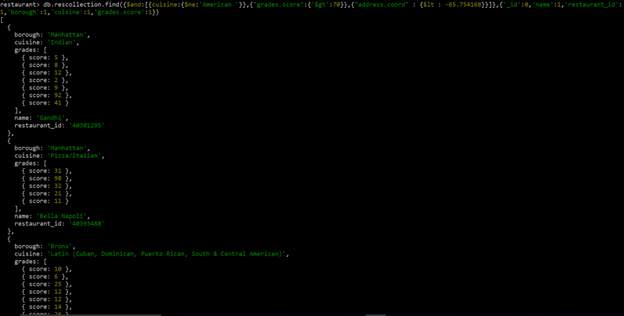